<a href="https://colab.research.google.com/github/melody199810/MachineLearningOnCarEval/blob/main/Final_Yao_Jing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

links:

medium: https://jingy.medium.com/machine-learning-on-car-evaluation-logistic-classification-ac8b4e02d2d4


In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
!pip install explode

  Using cached https://files.pythonhosted.org/packages/18/e0/1d4702dd81121d04a477c272d47ee5b6bc970d1a0990b11befa275c55cf2/pbr-5.6.0-py2.py3-none-any.whl
  Created wheel for explode: filename=explode-1.0.6-cp37-none-any.whl size=8793 sha256=a278189af6f150eece08b8b07c71c0223b8959345bae6b18e2f2fb36aab1a465
  Stored in directory: /root/.cache/pip/wheels/1f/11/64/8579afbcb2fdf6811611a71afa53c53ec2886a5b12dd651cbc
Successfully built explode


**Data Prep**

In [3]:
# import car evaluation dataset 
car = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/melody199810/classification-on-car-evaluation/main/car.csv', header = None))

In [4]:
# initial inspection of dataframe
print(car.shape)
car.head(-5)

(1728, 7)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good


In [5]:
# modify dataframe by adding headers

car.columns = ['BuyPrice','MaintPrice','Doors','Persons','LugBootSize','Safety','Class']

**Initial Inspection & Handling**

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BuyPrice     1728 non-null   object
 1   MaintPrice   1728 non-null   object
 2   Doors        1728 non-null   object
 3   Persons      1728 non-null   object
 4   LugBootSize  1728 non-null   object
 5   Safety       1728 non-null   object
 6   Class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
car.describe()

,BuyPrice,MaintPrice,Doors,Persons,LugBootSize,Safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [8]:
#check for null values
car.isnull()

,BuyPrice,MaintPrice,Doors,Persons,LugBootSize,Safety,Class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False


There is no null values and data types are all objects. 

**Graphs**

([<matplotlib.patches.Wedge at 0x7f9656317690>,
 [Text(-1.086582031885639, 0.17128773447995793, 'unacc'),
  Text(1.0131794244615928, -0.4283310096732147, 'acc'),
  Text(1.0027738692397954, 0.45215546791988503, 'vgood'),
  Text(0.8640961267661518, 0.6806892710390952, 'good')],
 [Text(-0.5926811083012575, 0.09342967335270431, '70.0%'),
  Text(0.552643322433596, -0.2336350961853898, '22.2%'),
  Text(0.5469675650398883, 0.24663025522902818, '4.0%'),
  Text(0.47132516005426456, 0.37128505693041547, '3.8%')])

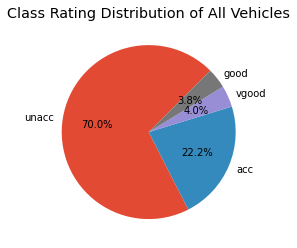

In [9]:
# class distribution pie chart

import explode 
plt.style.use('ggplot')
class_values = car['Class'].value_counts()

labels = []
for i in car['Class']:
  if i not in labels:
    labels.append(i)

plt.title('Class Rating Distribution of All Vehicles')
plt.pie(class_values, labels = labels , autopct='%.1f%%', startangle=45)

([<matplotlib.patches.Wedge at 0x7f965628f690>,
 [Text(-1.0999999999999996, -3.4329810281911156e-08, 'low'),
  Text(0.5500000891914619, -0.9526278926681625, 'med'),
  Text(0.5499998513475521, 0.9526280299873979, 'high')],
 [Text(-0.5999999999999998, -1.8725351062860628e-08, '33.3%'),
  Text(0.30000004864988833, -0.519615214182634, '33.3%'),
  Text(0.2999999189168466, 0.5196152890840352, '33.3%')])

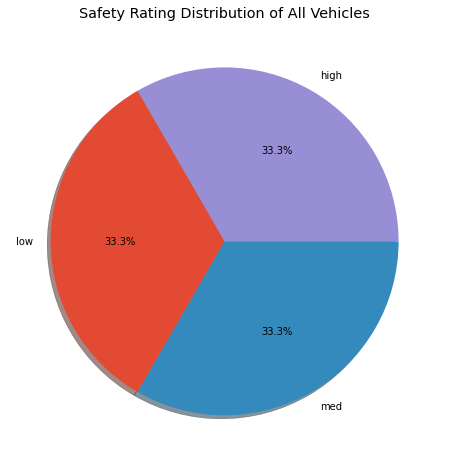

In [10]:
# safety distribution pie chart

size = car['Safety'].value_counts()

labels_1 = []
for i in car['Safety']:
  if i not in labels_1:
    labels_1.append(i)

plt.rcParams['figure.figsize'] = (8, 8)
plt.title('Safety Rating Distribution of All Vehicles')
plt.pie(size, labels = labels_1, shadow = True, startangle = 120, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f9655e1bd90>,
 [Text(-1.0625184089179749, 0.28470094961277365, 'vhigh'),
  Text(-0.2847009496127737, -1.0625184089179749, 'high'),
  Text(1.0625184089179749, -0.28470094961277376, 'med'),
  Text(0.2847009496127738, 1.0625184089179749, 'low')],
 [Text(-0.5795554957734408, 0.15529142706151286, '25.0%'),
  Text(-0.15529142706151292, -0.5795554957734408, '25.0%'),
  Text(0.5795554957734408, -0.15529142706151294, '25.0%'),
  Text(0.15529142706151297, 0.5795554957734408, '25.0%')])

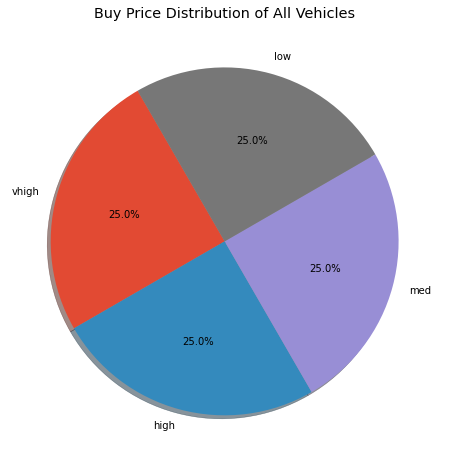

In [11]:
# buy price distribution pie chart

size = car['BuyPrice'].value_counts()

labels_2 = []
for i in car['BuyPrice']:
  if i not in labels_2:
    labels_2.append(i)

plt.rcParams['figure.figsize'] = (8, 8)
plt.title('Buy Price Distribution of All Vehicles')
plt.pie(size, labels = labels_2, shadow = True, startangle = 120, autopct = '%1.1f%%')

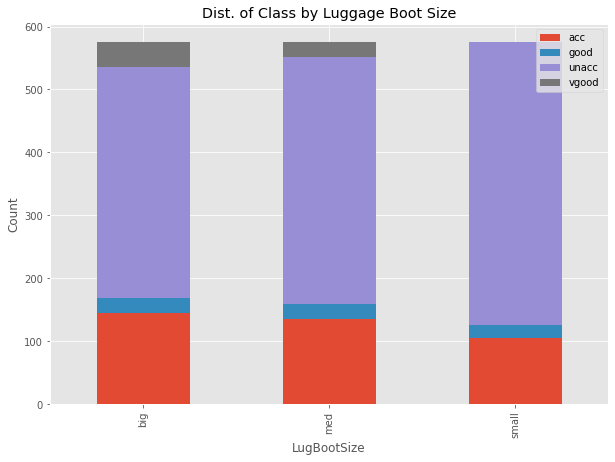

In [12]:
# stacked bar chart of class distribution of cars with different luggageboot sizes
Lug_Class= pd.crosstab(car['LugBootSize'], car['Class'])
Lug_Class.plot(kind = 'bar', stacked = 'True',figsize = (10, 7))

plt.title('Dist. of Class by Luggage Boot Size')
plt.ylabel('Count')
plt.legend(loc =0)


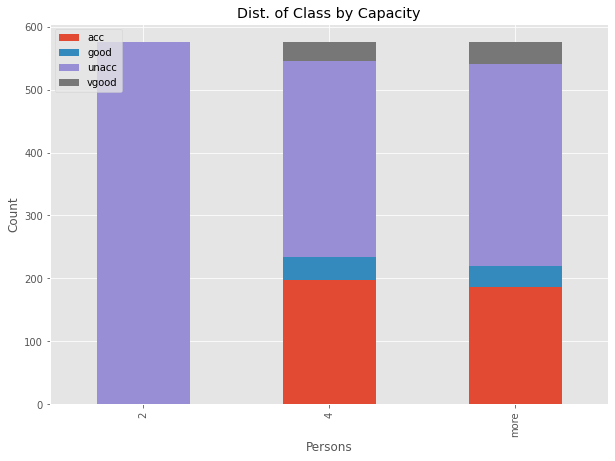

In [13]:
# stacked bar chart of class distribution of cars with different capacity
Lug_Class= pd.crosstab(car['Persons'], car['Class'])
Lug_Class.plot(kind = 'bar', stacked = 'True',figsize = (10, 7))

plt.title('Dist. of Class by Capacity')
plt.ylabel('Count')
plt.legend(loc =0)

 **Random Forest**

In [14]:
# Split your data in training and testing
# target varible is 'Class'
from sklearn.model_selection import train_test_split

x = car.iloc[:,:6]
y = car.iloc[:, 6]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2021)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1209, 6)
(1209,)
(519, 6)
(519,)


In [15]:
y_train.head()

744     unacc
1176    unacc
718       acc
1719    unacc
1130    vgood
Name: Class, dtype: object

In [16]:
#ordinal encoding; need to install ce first
!pip install category_encoders
import category_encoders as ce

df_x = ce.OrdinalEncoder(cols = ['BuyPrice','MaintPrice','Doors','Persons','LugBootSize','Safety'])

     |████████████████████████████████| 81kB 2.6MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
x_train_new = df_x.fit_transform(x_train)
x_test_new = df_x.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [18]:
# creating a model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score

model_rf = RandomForestClassifier(n_estimators=10, max_features=0.01,random_state=0)
model_rf.fit(x_train_new, y_train)

#predict w RF
y_pred = model_rf.predict(x_test_new)

#accuracy
acc_rf = accuracy_score(y_test,y_pred)
print('Accuracy score of Random Forest model is ', acc_rf)


Accuracy score of Random Forest model is  0.928709055876686


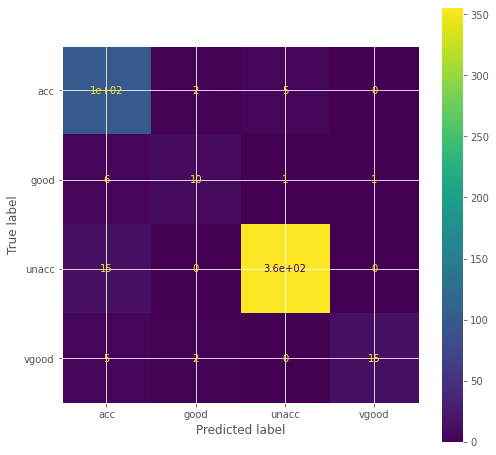

In [19]:
#visualization of accuracy of random forest model
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

matrix_rf = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(model_rf, x_test_new, y_test)
plt.show()

In [49]:
#test & train accuracy for random forest; training accuracy is high, there might be overfitting
print("Training Accuracy: ", model_rf.score(x_train_new, y_train))
print("Testing Accuracy: ", model_rf.score(x_test_new, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.928709055876686


In [20]:
#what are some important features in determining the class of the vehicle?
model_rf.feature_importances_
imp = pd.DataFrame(zip(x_train_new.columns, model_rf.feature_importances_))
print('Importance of Features in Determining Class by random forest: \n',imp)


Importance of Features in Determining Class by random forest: 
              0         1
0     BuyPrice  0.200555
1   MaintPrice  0.115303
2        Doors  0.056069
3      Persons  0.250574
4  LugBootSize  0.088864
5       Safety  0.288634


**Logistic Regression**

Accuracy score of Random Forest model is  0.8111753371868978


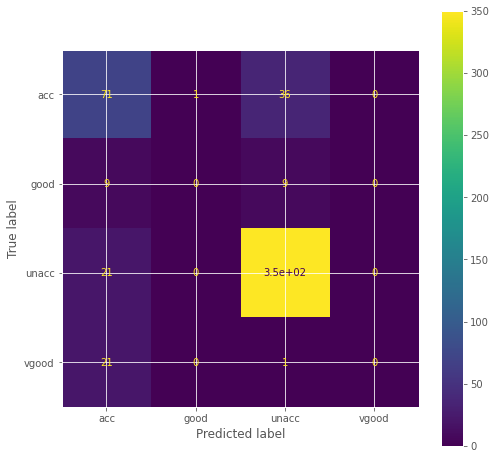

In [22]:
# logistic regression model 
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=10000)
logReg.fit(x_train_new, y_train)

#predict
y_pred_lr = logReg.predict(x_test_new)
matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
metrics.plot_confusion_matrix(logReg, x_test_new, y_test)

#accuracy score
acc_lr = accuracy_score(y_test,y_pred_lr)
print('Accuracy score of Random Forest model is ', acc_lr)



In [47]:
#test & train accuracy for logistic regression
print("Training Accuracy: ",logReg.score(x_train_new, y_train))
print("Testing Accuracy: ", logReg.score(x_test_new, y_test))

Training Accuracy:  0.7799834574028123
Testing Accuracy:  0.8111753371868978


In [25]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier (max_depth =4)
ada_boost = AdaBoostClassifier(dt, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost.fit(x_train_new, y_train)

res = round(accuracy_score(y_test, ada_boost.predict(x_test_new)),4)
print('Accuracy score of an AdaBoost Classcification Model is '+ str(res))

Accuracy score of an AdaBoost Classcification Model is 0.9422


In [48]:
#test & train accuracy for adaboost model
print("Training Accuracy: ",ada_boost.score(x_train_new, y_train))
print("Testing Accuracy: ", ada_boost.score(x_test_new, y_test))

Training Accuracy:  0.9404466501240695
Testing Accuracy:  0.9421965317919075


**Cross Validation**

In [40]:
from sklearn.model_selection import cross_validate,cross_val_score

# for logistic regression model; accuracy drops

cv_results = cross_val_score(logReg, x_train_new, y_train, cv=10)
print('After cross validation on logistic regression model, the mean of cross validation scores is '+ str(cv_results.mean()))

After cross validation on logistic regression model, the mean of cross validation scores is 0.7749931129476584


In [39]:
# for random forest; accuracy improved

cv_results_1 = cross_val_score(model_rf, x_train_new, y_train, cv=10)
print('After cross validation on random forest model, the mean of cross validation scores is '+ str(cv_results_1.mean()))

After cross validation on random forest model, the mean of cross validation scores is 0.9288774104683195


**Overfitting Prevention** 

In [42]:
#L1 regularization

from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
#reg.fit([[0, 0], [1, 1]], [0, 1])
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
reg.coef_

array([0.5, 0. ])

In [44]:
reg.intercept_

0.20000000000000004

**Try Making Predictions**